In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: C:\Users\KokoyTv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv('datasets\\Global_terrorist.csv', encoding='ISO-8859-1')

In [4]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
filter1 = df[df['region_txt'] == 'Middle East & North Africa']
filter2 = filter1[filter1['iyear'] > 2000]

In [6]:
filter2['attacktype1_txt'].value_counts()

attacktype1_txt
Bombing/Explosion                      26819
Armed Assault                           6980
Hostage Taking (Kidnapping)             2316
Assassination                           2157
Unknown                                 1597
Facility/Infrastructure Attack           698
Unarmed Assault                          102
Hostage Taking (Barricade Incident)       70
Hijacking                                 67
Name: count, dtype: int64

In [7]:
filter3 = filter2[filter2['attacktype1_txt'] == 'Bombing/Explosion']

In [8]:
final_filter = filter2[['latitude', 'longitude']]
final_filter = final_filter.dropna()

In [9]:
filter3

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
71651,200101010001,2001,1,1,NaN,0,NaN,228,Yemen,10,...,NaN,Bomb Blast Outside Yemeni News Agency Office ...,"Authorities Arrest Suspects in Aden Bombings,...",NaN,CETIS,-9,-9,0,-9,NaN
71653,200101010004,2001,1,1,NaN,0,NaN,209,Turkey,10,...,The governor of Istanbul stated that the attac...,"""Bomb explosion injures 10 Turks, mars new yea...","""10 injuries in bomb explosion in Istanbul,"" A...","""Update 1 - Ten wounded in Istanbul bomb blast...",UMD Schmid 2012,-9,-9,0,-9,NaN
71655,200101020002,2001,1,2,NaN,0,NaN,228,Yemen,10,...,NaN,Bomb Blast Outside Yemeni News Agency Office ...,Bomb Explodes Near Offices of Official News A...,"Authorities Arrest Suspects in Aden Bombings,...",CETIS,-9,-9,0,-9,NaN
71658,200101030001,2001,1,3,NaN,0,NaN,209,Turkey,10,...,NaN,Suicide Bomber Dies in Attack on Turkish Poli...,"Turkish Suicide Bombing Kills Three, United ...",Extreme Left Turkish Group Claims Responsibil...,CETIS,0,0,0,0,NaN
71685,200101080001,2001,1,8,NaN,0,NaN,97,Israel,10,...,NaN,Hamas Announces Death of Own Militant in Neta...,Islamic Militant Group Hamas Claims Responsib...,"Hamas Leader on Netanya Attack, Possibility o...",CETIS,1,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,201712300026,2017,12,30,NaN,0,NaN,200,Syria,10,...,NaN,"""Al-Qaida affiliates start new year with offen...","""Syrian army driven back in east Damascus in a...","""BBCM: Syria -- Fierce Fighting Continues Arou...",START Primary Collection,0,0,0,0,NaN
181668,201712310001,2017,12,31,2017-12-31 00:00:00,0,NaN,95,Iraq,10,...,NaN,"""Iraq: Security Roundup 1900 GMT 31 December 2...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181669,201712310002,2017,12,30,NaN,0,NaN,95,Iraq,10,...,Casualty numbers conflict across sources. Foll...,"""Five civilians killed in two bomb attacks in ...","""Iraq: Security Roundup 1900 GMT 31 December 2...","""Iraq: Roundup of Violent Activities Targeting...",START Primary Collection,-9,-9,0,-9,"201712300005, 201712310002"
181671,201712310004,2017,12,31,NaN,0,NaN,95,Iraq,10,...,Casualty numbers conflict across sources. Foll...,"""Islamic State attack leaves thirteen civilian...","""3 people killed in IS attack in central Iraq,...","""Daesh gunmen kill 3 in northern Iraq: Police,...",START Primary Collection,0,1,0,1,NaN


In [10]:
final_filter['incident_count'] = 1

In [11]:
heatmap_data = final_filter[['latitude', 'longitude', 'incident_count']].values.tolist()

In [12]:
print("Columns available in the dataset:", df.columns)

Columns available in the dataset: Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [13]:
my_map = folium.Map(location=[30, 40], zoom_start=4)

In [14]:
HeatMap(heatmap_data).add_to(my_map)

In [15]:
my_map.save('terrorism_bombing.html')
print("data saved")

data saved


In [16]:
my_map

In [17]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<h1><span style='color: red;'>INSIGHT NUMBER 1: </span>
</h1>
<h3><span style='color: red;'>Based on the bar chart, what patterns can you see in the annual number of terror incidents from 2001 to 2017?
What variables could account for the notable rise or fall in some years? </span></h3>

<h1><span style='color: blue;'>From the chart, we observe that the number of terror attacks remained relatively low from 2001 to 2010, with a gradual increase starting around 2004.
However, there is a sharp rise in attacks beginning in 2011, peaking around 2014, and then slightly declining after 2015.
The highest number of attacks occurred in 2014, with over 7000 reported cases.</span></h1>

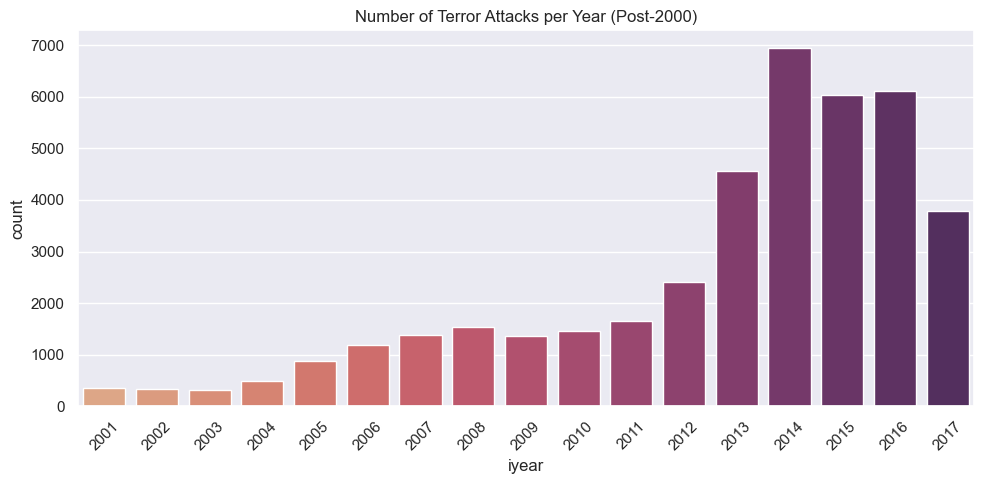

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(data=filter2, x='iyear', palette='flare')
plt.title("Number of Terror Attacks per Year (Post-2000)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1><span style='color: red;'> INSIGHT NUMBER 2:</h1>
<h3><span style='color: red;'> Which countries experienced the highest number of terror attacks,
and what factors might explain why these countries are most affected?</h3>

<h2><span style='color: blue;'> Iraq is the nation with the highest number of terror attacks, followed by Yemen,
Libya, Syria, Egypt, Turkey, the West Bank and Gaza Strip, Algeria, Israel, and Lebanon, the graphic shows.
Attacks in Iraq are substantially more frequent than in the other countries.</h2>

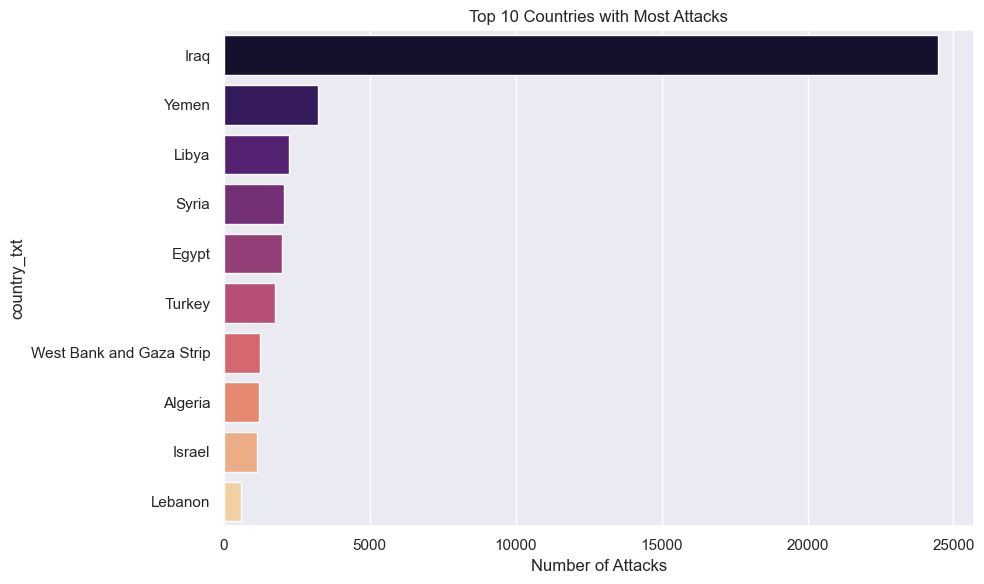

In [19]:
plt.figure(figsize=(10, 6))
top_countries = filter2['country_txt'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title("Top 10 Countries with Most Attacks")
plt.xlabel("Number of Attacks")
plt.tight_layout()
plt.show()

<h1><span style='color: red;'> INSIGHT NUMBER 3:</h1>
<h3><span style='color: red;'> What are the most common types of terror attacks post-2000, and why might some types be more frequent than others?</h3>

<h2><span style='color: blue;'> According to the chart, armed assault is the second most frequent form of terror attack after 2000, behind bombing explosions.
Other kinds, like facility/infrastructure attacks, kidnapping, and hostage-taking, happen much less frequently</23>.

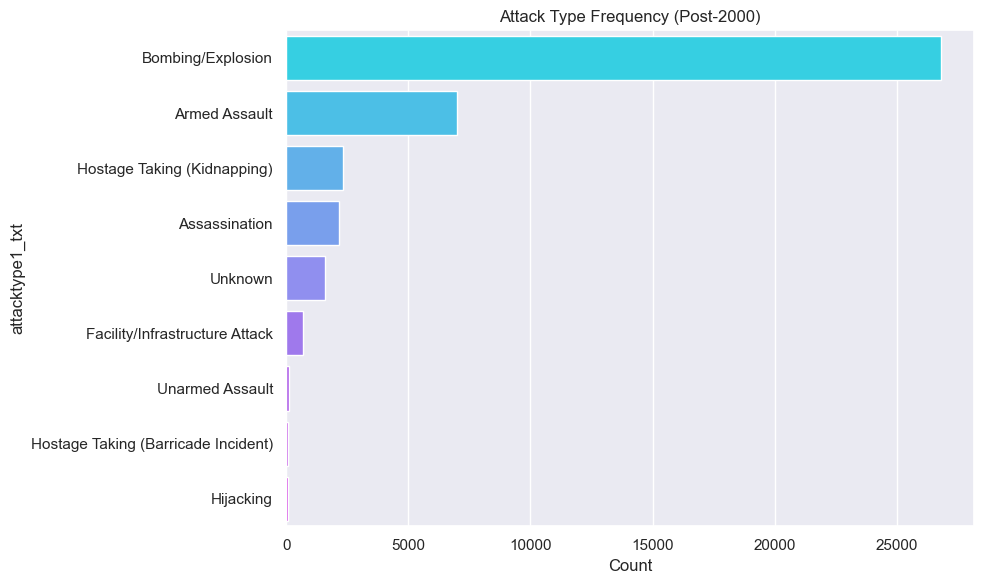

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filter2, y='attacktype1_txt', order=filter2['attacktype1_txt'].value_counts().index, palette='cool')
plt.title("Attack Type Frequency (Post-2000)")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

<h1><span style='color: red;'> INSIGHT NUMBER 4:</h1>
<h3><span style='color: red;'> Which cities were most frequently targeted in terror attacks, and why might these cities be particularly vulnerable?</h3>

<h2><span style='color: blue;'> According to the chart, the most targeted cities were Baghdad, Mosul, Kirkuk, Benghazi, and others.
Additionally, a sizable portion of attacks have an unknown location.</h2>

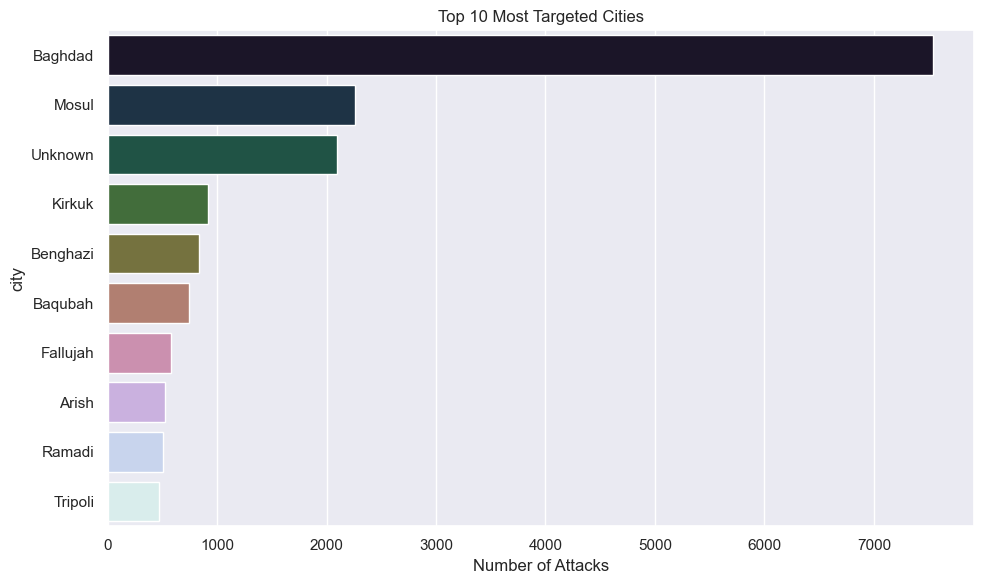

In [21]:
plt.figure(figsize=(10, 6))
top_cities = filter2['city'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='cubehelix')
plt.title("Top 10 Most Targeted Cities")
plt.xlabel("Number of Attacks")
plt.tight_layout()
plt.show()

<h1><span style='color: red;'> INSIGHT NUMBER 5:</h1>
<h3><span style='color: red;'> Which countries have the highest total number of deaths from terror attacks,
and what does this indicate about the severity of terrorism in those regions?</h3>

<h2><span style='color: blue;'> The country with the most fatalities overall is Iraq, followed by Syria, Yemen, and Algeria.</h2>

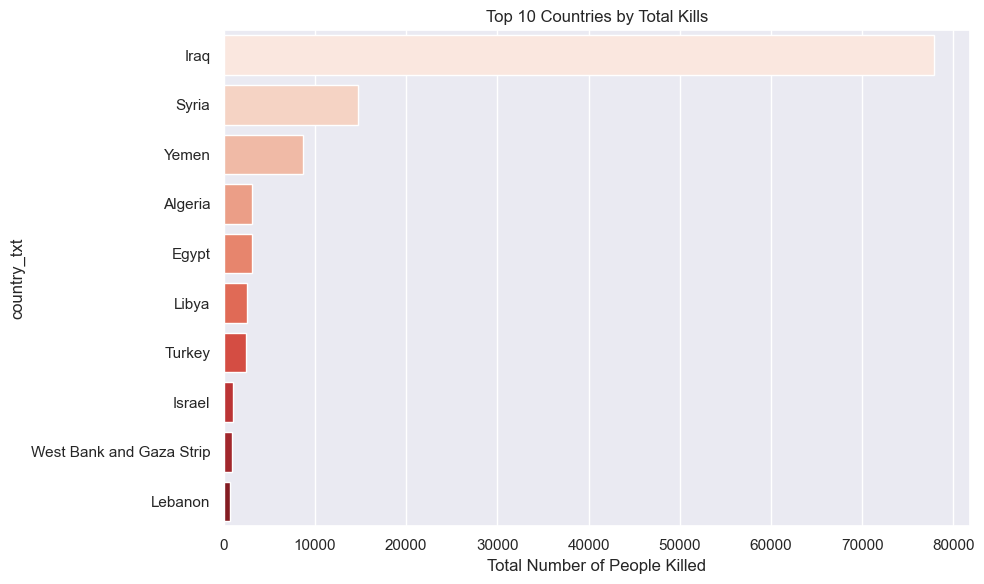

In [22]:
plt.figure(figsize=(10, 6))
deaths_by_country = filter2.groupby('country_txt')['nkill'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=deaths_by_country.values, y=deaths_by_country.index, palette='Reds')
plt.title("Top 10 Countries by Total Kills")
plt.xlabel("Total Number of People Killed")
plt.tight_layout()
plt.show()

<h1><span style='color: red;'> INSIGHT NUMBER 6:</h1>
<h3><span style='color: red;'> Nationality Analysis</h3>
<h3><span style='color: red;'> Which nationality is most involved in terrorism-related incidents, and how does this impact regions with a high concentration of incidents?</h3>

<h2><span style='color: blue;'> According to the data, Pakistan is among the nations most frequently implicated in acts of terrorism,
with a significant number of instances taking place after 2015.</h2>

In [23]:
filtered_nationality = df[
    (df['country_txt'] == 'Pakistan') &
    (df['iyear'] >= 2015)
].copy()

In [24]:
nationality_df = filtered_nationality[['natlty1_txt', 'latitude', 'longitude']].dropna()
map_natly = folium.Map(location=[30, 70], zoom_start=4)
HeatMap(data=nationality_df[['latitude', 'longitude']]).add_to(map_natly)
map_natly

<h1><span style='color: red;'> INSIGHT NUMBER 7:</h1>
<h3><span style='color: red;'> Regional Analysis</h3>
<h3><span style='color: red;'> Which regions experience the most frequent terrorist attacks, and how do these regions correlate with ongoing conflicts?</h3>

<h2><span style='color: blue;'> Since 2015, the region most impacted by terrorism has been the Middle East and North Africa.
Targets include nations including Yemen, Syria, and Iraq.</h2>

In [25]:
filtered_region = df[
    (df['region_txt'] == 'Middle East & North Africa') &
    (df['iyear'] >= 2015)
].copy()

In [26]:
region_df = filtered_region[['latitude', 'longitude']].dropna()
map_region = folium.Map(location=[30, 40], zoom_start=4)
HeatMap(data=region_df[['latitude', 'longitude']]).add_to(map_region)
map_region

<h1><span style='color: red;'> INSIGHT NUMBER 8:</h1>
<h3><span style='color: red;'> Target Analysis</h2>
<h3><span style='color: red;'> Which targets civilians, government buildings are most often the focus of terrorist attacks,
and what does this reveal about terrorist strategies?</h3>

<h2><span style='color: blue;'> Terrorist organizations primarily target government facilities, particularly in areas where governments are perceived as repressive or illegitimate.
Attacks against government institutions have a significant impact on nations like Syria and Iraq.</h2>

In [27]:
print(df.columns)

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [28]:
filtered_target = df[
    (df['region'] == 'Government') &
    (df['iyear'] >= 2015)
].copy()

In [29]:
target_df = filtered_target[['latitude', 'longitude']].dropna()

# Generate the map
map_target = folium.Map(location=[30, 40], zoom_start=4)
HeatMap(data=target_df[['latitude', 'longitude']]).add_to(map_target)

# Display the map
map_target

<h1><span style='color: red;'> INSIGHT NUMBER 9:</h1>
<h3><span style='color: red;'> Casualty Analysis</h3>
<h3><span style='color: red;'> Which areas have the highest number of casualties from terrorist attacks, and how does this impact local communities?</h3>

<h2><span style='color: blue;'> The majority of instances with a high death toll take place in war-torn regions like Syria and Iraq,
where widespread terrorist attacks, bombings, and massacres take place.</h2>

In [30]:
filtered_casualty = df[
    (df['nkill'] > 100) &
    (df['iyear'] >= 2015)
].copy()

In [31]:
casualty_df = filtered_casualty[['latitude', 'longitude']].dropna()
map_casualty = folium.Map(location=[30, 40], zoom_start=4)
HeatMap(data=casualty_df[['latitude', 'longitude']]).add_to(map_casualty)
map_casualty

<h1><span style='color: red;'> INSIGHT NUMBER 10:</h1>
<h3><span style='color: red;'> Attack Type Analysis</h3>
<h3><span style='color: red;'> What are the most common types of terrorist attacks, and how do they reflect evolving tactics by terrorist groups?</h3>

<h2><span style='color: blue;'> The most frequent kind of terrorist attacks are bombings and explosives, indicating that terrorist organizations frequently favor low-risk,
high-impact techniques to sow confusion and panic.</h2>

In [32]:
filtered_attack = df[
    (df['attacktype1_txt'] == 'Bombing/Explosion') &
    (df['iyear'] >= 2015)
].copy()

In [33]:
attack_df = filtered_attack[['latitude', 'longitude']].dropna()
map_attack = folium.Map(location=[30, 40], zoom_start=4)
HeatMap(data=attack_df[['latitude', 'longitude']]).add_to(map_attack)
map_attack